In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Times New Roman',
          'font.size': 15,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

# results = np.load("./output/results.npy").reshape(61, 30, 100, 400) # 时刻 种类
# n = np.load("./output/porosity.npy").reshape(61, 100, 400)
# K = np.load("./output/K.npy").reshape(61, 100, 400)

zimu = "B"

results = np.load(f"./output/{zimu}/results.npy").reshape(181, 30, 100, 400) # 时刻 种类
n = np.load(f"./output/{zimu}/results_porosity.npy").reshape(181, 100, 400)
K = np.load(f"./output/{zimu}/results_K.npy").reshape(181, 100, 400)
K_log = np.log(K)

# heads = np.load(f"./output/{zimu}/heads.npy").reshape(180, 100, 400)

print(results.shape)
print(n.shape)
print(K.shape)
# print(heads.shape)

# ['0 K' '1 Na' '2 Ca' '3 Mg' '4 Li' '5 Cl' '6 S(6)' '7 C(4)' '8 Halite'
#  '9 Carnallite' '10 Polyhalite' '11 Sylvite' '12 Gypsum' '13 Calcite' '14 Dolomite'
#  '15 d_Halite' '16 d_Carnallite' '17 d_Polyhalite' '18 d_Sylvite' '19 d_Gypsum' '20 d_Calcite' '21 d_Dolomite'
#  '22 density(kg/m3)'
#  '23 SI_Halite' '24 SI_Carnallite' '25 SI_Polyhalite' '26 SI_Sylvite' '27 SI_Gypsum' '28 SI_Calcite' '29 SI_Dolomite']

(181, 30, 100, 400)
(181, 100, 400)
(181, 100, 400)


In [6]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
# config = {'font.family': 'Times New Roman',
#           'font.size': 15,
#           'xtick.direction': 'in',
#           'ytick.direction': 'in',
#           'mathtext.fontset': 'stix',
#          }
# plt.rcParams.update(config)

# zimu = "B"

# results = np.load(f"./output/results.npy").reshape(61, 30, 100, 400) # 时刻 种类
# n = np.load(f"./output/results_porosity.npy").reshape(61, 100, 400)
# K = np.load(f"./output/results_K.npy").reshape(61, 100, 400)
# K_log = np.log(K)

# # heads = np.load(f"./output/heads.npy").reshape(60, 100, 400)

# print(results.shape)
# print(n.shape)
# print(K.shape)
# # print(heads.shape)

# # ['0 K' '1 Na' '2 Ca' '3 Mg' '4 Li' '5 Cl' '6 S(6)' '7 C(4)' '8 Halite'
# #  '9 Carnallite' '10 Polyhalite' '11 Sylvite' '12 Gypsum' '13 Calcite' '14 Dolomite'
# #  '15 d_Halite' '16 d_Carnallite' '17 d_Polyhalite' '18 d_Sylvite' '19 d_Gypsum' '20 d_Calcite' '21 d_Dolomite'
# #  '22 density(kg/m3)'
# #  '23 SI_Halite' '24 SI_Carnallite' '25 SI_Polyhalite' '26 SI_Sylvite' '27 SI_Gypsum' '28 SI_Calcite' '29 SI_Dolomite']

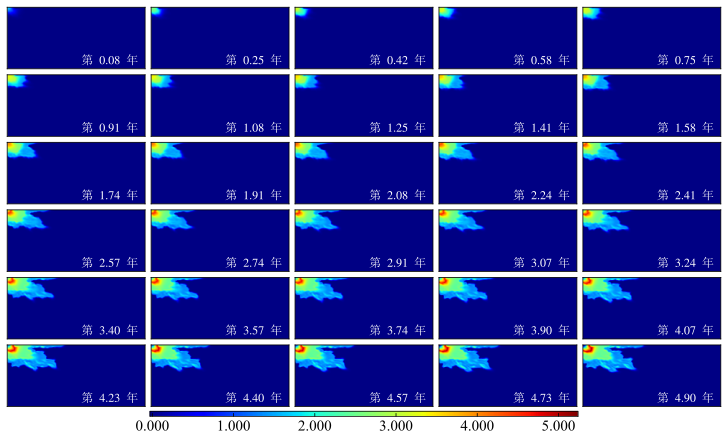

In [8]:
import numpy as np
import matplotlib.pyplot as plt

kuangwuxinghao = 8

# 原始的百分比变化数据
data_to_plot_percent = [
    (results[i, kuangwuxinghao, :, :] - results[0, kuangwuxinghao, :, :]) / results[0, kuangwuxinghao, :, :] *100
    for i in range(1, 61, 2)
]

# 计算全局的 vmin 和 vmax，便于统一色标
all_values = np.concatenate([arr.flatten() for arr in data_to_plot_percent])
vmin = np.min(all_values)
vmax = np.max(all_values)

# 布局
n_rows, n_cols = 6, 5
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10, 6),
    constrained_layout=True
)
axes = axes.flatten()
time_points = list(range(1, 61, 2))
# 绘图循环
for idx, arr in enumerate(data_to_plot_percent):
    ax = axes[idx]
    mappable = ax.imshow(
        arr,
        cmap="jet",
        vmin=vmin,
        vmax=vmax,
        aspect='auto'
    )
    # ax.set_title(f'K[{idx*2+1}] - K[0] (%)')
    ax.set_xticks([])
    ax.set_yticks([])

    # 计算当前时刻对应的“年”
    t = time_points[idx]       # 原始时刻编号：1,3,5,...
    year = t * 0.083        # 0–9→1年；10–19→2年；20–29→3年

    # 在坐标轴的右下角添加文本
    ax.text(
        0.95, 0.05,      # 坐标轴内位置 (x, y)，右下角
        f'第 ${year:.2f}$ 年',
        transform=ax.transAxes,
        fontdict={'family': 'SimSun'},
        ha='right', va='bottom',
        fontsize=12,
        color='white',
    )
# 删除多余的子图
for ax in axes[len(data_to_plot_percent):]:
    fig.delaxes(ax)

# 添加 colorbar
cbar = fig.colorbar(
    mappable,
    ax=axes[:len(data_to_plot_percent)].tolist(),
    location='bottom',
    pad=0.01,
    aspect=80,
    format='%.3f',
    shrink=0.6
)
# cbar.set_label('Percentage Change (%)')

# 显示图像
plt.show()